# Import Libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## DATA Analysis

In [44]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [47]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

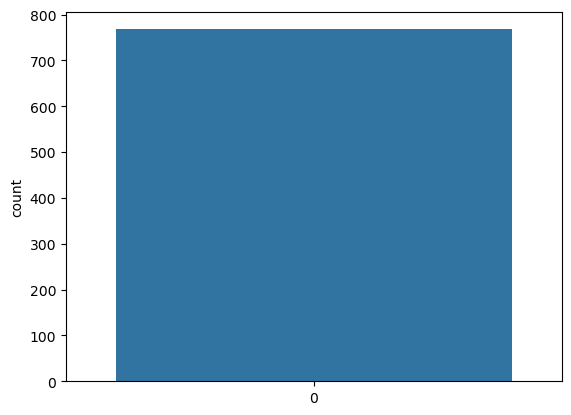

In [49]:
sns.countplot(data['Outcome']);

<Axes: xlabel='Pregnancies', ylabel='BMI'>

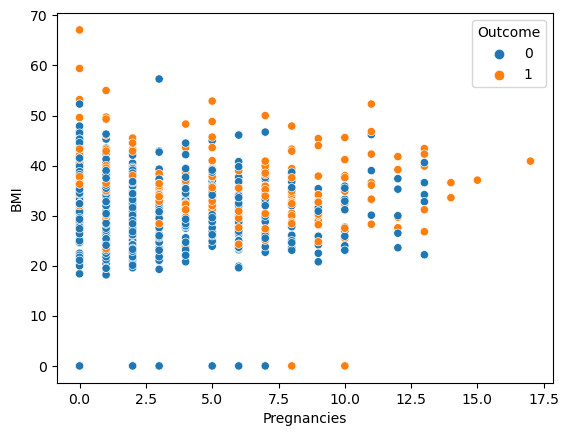

In [50]:
sns.scatterplot(x='Pregnancies',y='BMI',data=data,hue='Outcome')

In [51]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

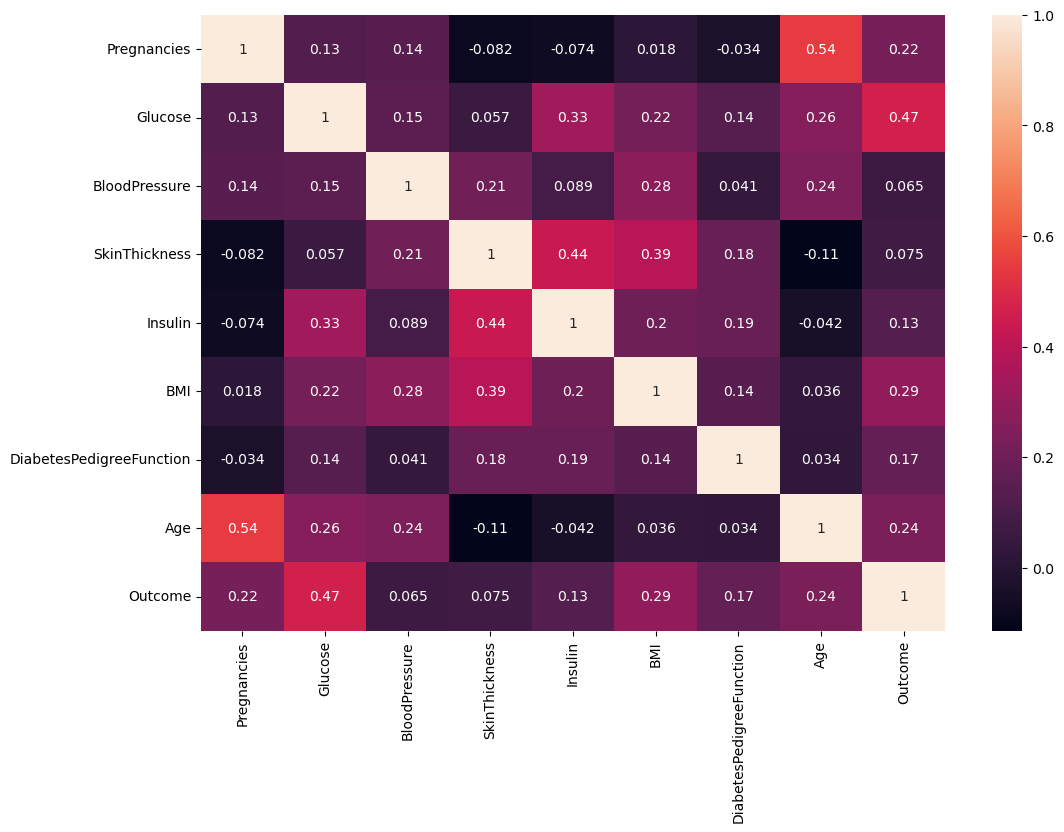

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

## Dividing the dataset into dependent and independent columns

In [53]:
X= data.drop('Outcome',axis=1)
y=data['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [54]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Splitting the dataset into training and testing set
#### 20% of the dataset will be used for testing(evaluation) and 80% of the data will be used for training purposes

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression

In [56]:
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train, y_train)
log_pred = log_model.predict(scaled_X_test)
log_cm = confusion_matrix(y_test, log_pred)
log_ac = accuracy_score(y_test, log_pred)
rounded_log_ac = np.round(float(log_ac), 2)
print(f"Accuracy: {rounded_log_ac * 100}")
# print("Confusion Matrix {0}".format(log_conf))
print("Confusion Matrix: ")
print(log_cm)

Accuracy: 78.0
Confusion Matrix: 
[[109  15]
 [ 27  41]]


### Report back your search's optimal parameters, specifically the C value

In [57]:
log_model.C_

array([2.7825594])

In [58]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [59]:
log_model.coef_

array([[ 0.40701825,  1.06849197, -0.1860745 , -0.03805949, -0.07143765,
         0.68821734,  0.34912127,  0.19755807]])

### Model Performance Evaluation

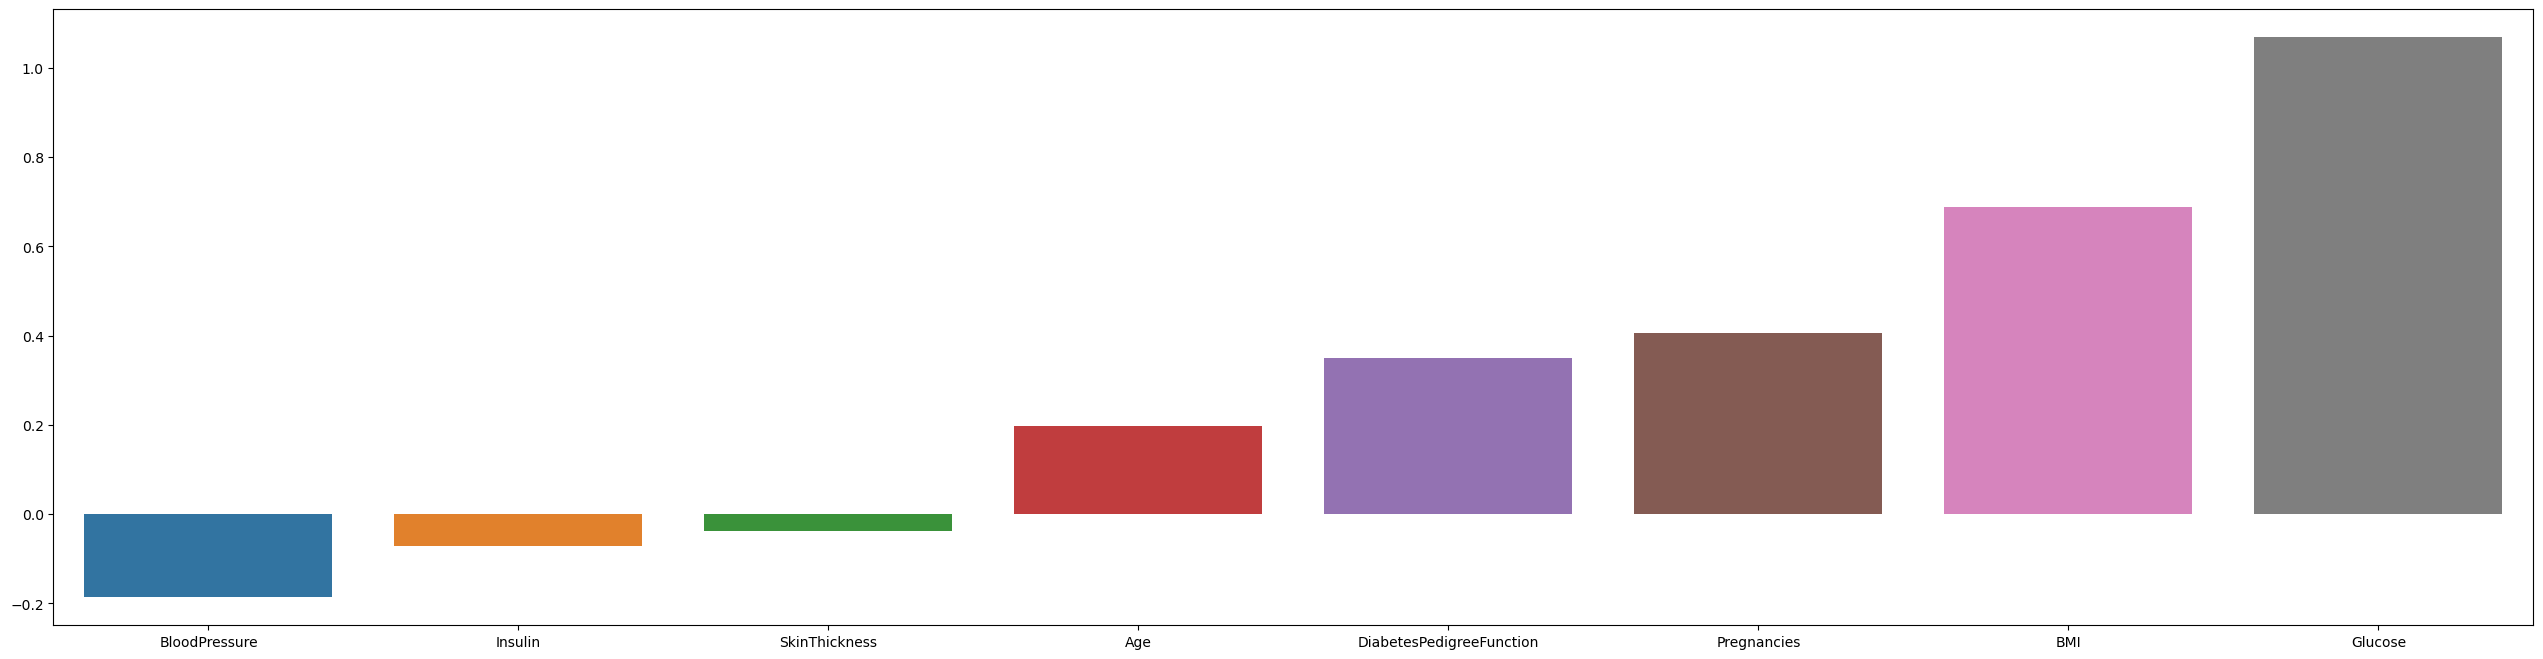

In [60]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(32,8))
sns.barplot(x=coefs.index,y=coefs.values);

In [61]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
y_pred = log_model.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[109  15]
 [ 27  41]]
0.78125


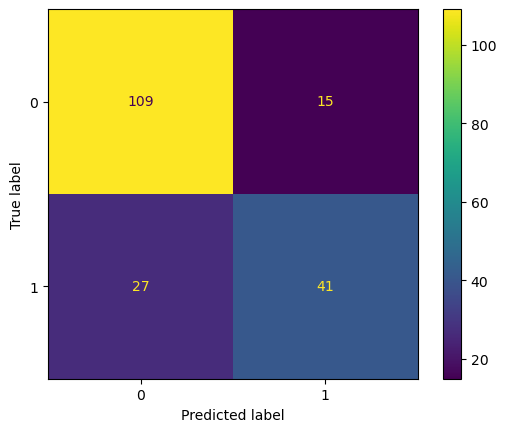

In [62]:
cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot()
plt.show()

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       124
           1       0.73      0.60      0.66        68

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



In [64]:
# !pip install --upgrade scikit-learn

### Performance Curves

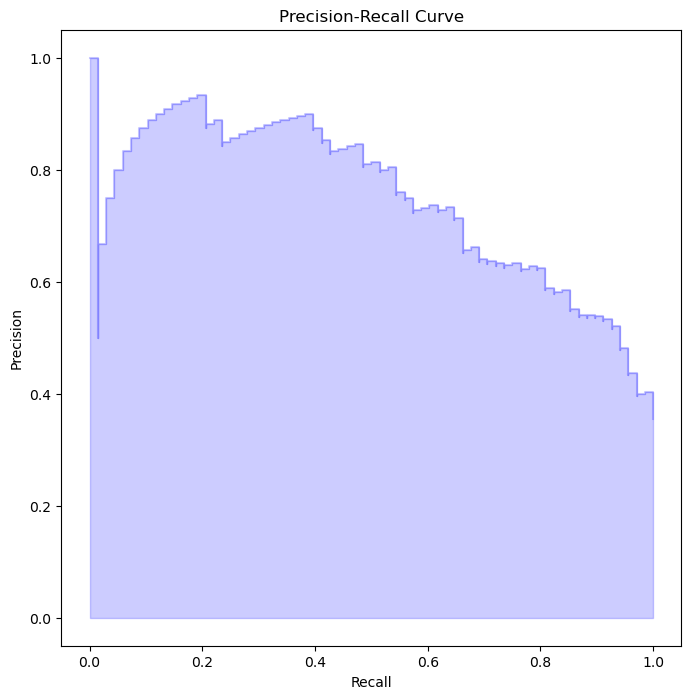

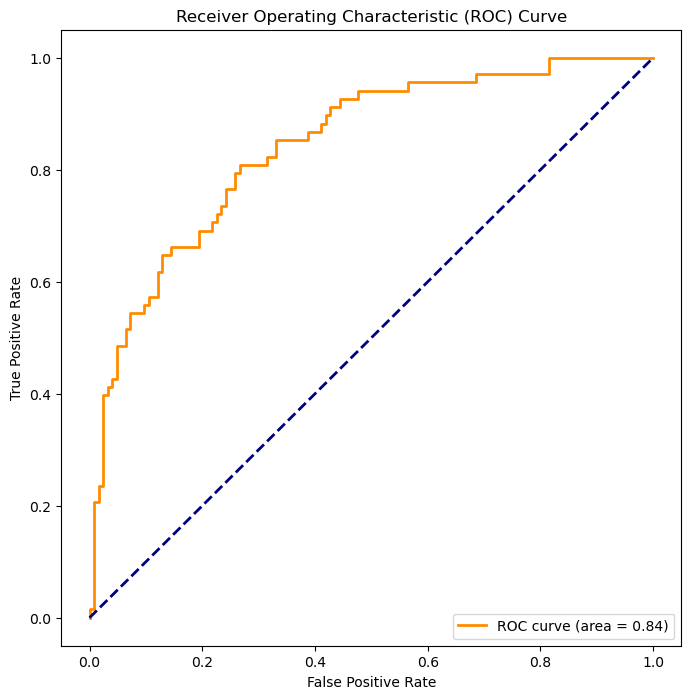

In [65]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming log_model, scaled_X_test, and y_test are defined

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, log_model.predict_proba(scaled_X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(scaled_X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [66]:
knn = KNeighborsClassifier()
operations = [('scaler', scaler), ('knn', knn)]
pipe = Pipeline(operations)
k_values = list(range(1, 30))
knn_param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe, knn_param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(scaled_X_train, y_train)
full_cv_classifier.best_estimator_.get_params()
knn_pred = full_cv_classifier.predict(scaled_X_test)
knn_cm = confusion_matrix(y_test, knn_pred)
knn_ac = accuracy_score(y_test, knn_pred)
rounded_knn_ac = np.round(float(knn_ac), 2)
print(f"Accuracy: {rounded_knn_ac * 100}")
print("Confusion Matrix: ")
print(knn_cm)

Accuracy: 77.0
Confusion Matrix: 
[[111  13]
 [ 32  36]]


### Model Performance Evaluation

Confusion Matrix:
[[111  13]
 [ 32  36]]


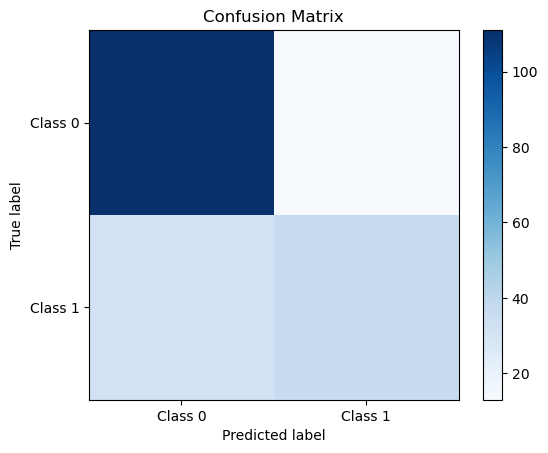

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       124
           1       0.73      0.53      0.62        68

    accuracy                           0.77       192
   macro avg       0.76      0.71      0.72       192
weighted avg       0.76      0.77      0.75       192



In [67]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming you have trained the classifier (full_cv_classifier) and scaled your test data (scaled_X_test)

# Make predictions
y_pred = full_cv_classifier.predict(scaled_X_test)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix using matplotlib
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

classes = ["Class 0", "Class 1"]  # Adjust class names if needed
tick_marks = [0, 1]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



### Performance Curve

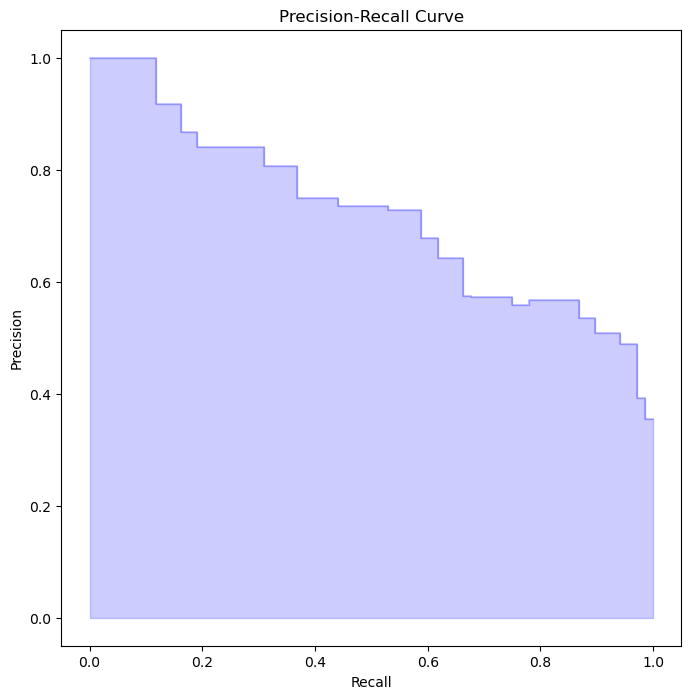

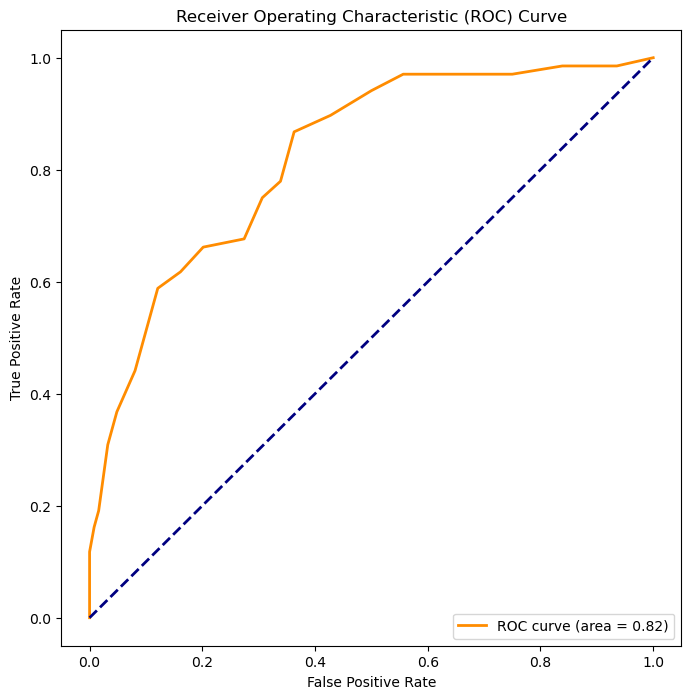

In [68]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming log_model, scaled_X_test, and y_test are defined

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, full_cv_classifier.predict_proba(scaled_X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, full_cv_classifier.predict_proba(scaled_X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Support Vector Machine

In [69]:
svc = SVC(class_weight='balanced')
svc_param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'gamma': ['scale', 'auto']}
svc_grid = GridSearchCV(svc, svc_param_grid)
svc_grid.fit(scaled_X_train, y_train)
svc_grid_pred = svc_grid.predict(scaled_X_test)
svc_cm = confusion_matrix(y_test, svc_grid_pred)
svc_ac = accuracy_score(y_test, svc_grid_pred)
rounded_svc_ac = np.round(float(svc_ac), 2)
print(f"Accuracy: {rounded_svc_ac * 100}")
print("Confusion Matrix: ")
print(svc_cm)

Accuracy: 72.0
Confusion Matrix: 
[[85 39]
 [14 54]]


### Decision Tree Machine

In [70]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(scaled_X_train, y_train)
decision_tree_pred = decision_tree_model.predict(scaled_X_test)
dt_cm = confusion_matrix(y_test, decision_tree_pred)
dt_ac = accuracy_score(y_test, decision_tree_pred)
rounded_dt_ac = np.round(float(dt_ac), 2)
print(f"Accuracy: {rounded_dt_ac * 100}")
print("Confusion Matrix: ")
print(dt_cm)

Accuracy: 71.0
Confusion Matrix: 
[[89 35]
 [20 48]]


### Random Forest Machine

In [71]:
# Use 10 random trees
Random_Forest_model = RandomForestClassifier(n_estimators=10, random_state=101)
Random_Forest_model.fit(scaled_X_train, y_train)
Random_Forest_preds = Random_Forest_model.predict(scaled_X_test)
rf_cm = confusion_matrix(y_test, Random_Forest_preds)
rf_ac = accuracy_score(y_test, Random_Forest_preds)
rounded_rf_ac = np.round(float(rf_ac), 2)
print(f"Accuracy: {rounded_rf_ac * 100}")
print("Confusion Matrix: ")
print(rf_cm)

Accuracy: 78.0
Confusion Matrix: 
[[110  14]
 [ 28  40]]


### Boosting - Ada Boost

In [72]:
ada_boost_model = AdaBoostClassifier(n_estimators=15)
ada_boost_model.fit(scaled_X_train, y_train)
ada_boost_preds = ada_boost_model.predict(scaled_X_test)
adb_cm = confusion_matrix(y_test, ada_boost_preds)
adb_ac = accuracy_score(y_test, ada_boost_preds)
rounded_adb_ac = np.round(float(adb_ac), 2)
print(f"Accuracy: {rounded_adb_ac * 100}")
print("Confusion Matrix: ")
print(adb_cm)

Accuracy: 77.0
Confusion Matrix: 
[[100  24]
 [ 20  48]]


### Boosting - Gradient Boost

In [73]:
gb_model = GradientBoostingClassifier()
gb_param_grid = {"n_estimators": [1, 5, 10, 20, 40, 100], 'max_depth': [3, 4, 5, 6]}
gb_grid = GridSearchCV(gb_model, gb_param_grid)
gb_grid.fit(scaled_X_train, y_train)
gb_predictions = gb_grid.predict(scaled_X_test)
gb_cm = confusion_matrix(y_test, gb_predictions)
gb_ac = accuracy_score(y_test, gb_predictions)
rounded_gb_ac = np.round(float(gb_ac), 2)
print(f"Accuracy: {rounded_gb_ac * 100}")
print("Confusion Matrix: ")
print(gb_cm)

Accuracy: 77.0
Confusion Matrix: 
[[106  18]
 [ 27  41]]


### Prediction on New Data

In [74]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [75]:
data_new = {'Pregnancies': 6, 'Glucose': 148, 'BloodPressure': 72, 'SkinThickness': 35, 'Insulin': 0,
            'BMI': 33.6, 'DiabetesPedigreeFunction': 0.627, 'Age': 50}
index = [1]  # serial number
my_data = pd.DataFrame(data_new, index)

In [76]:
def log_reg():
    medical_details = log_model.predict(my_data.values)
    # print(type(medical_details))
    if medical_details == 0:
        print("Predicted using Logistic Regression: The patient has NO symptoms of Diabetes ")
    else:
        print("Predicted using Logistic Regression: The patient has symptoms of Diabetes ")

    print(f"Above data is calculated with an Accuracy {rounded_log_ac * 100}% ")


def knn_reg():
    medical_details = full_cv_classifier.predict(my_data.values)
    # print(type(medical_details))
    if medical_details == 0:
        print("Predicted using KNN : The patient has NO symptoms of Diabetes ")
    else:
        print("Predicted using KNN: The patient has symptoms of Diabetes ")

    print(f"Above data is calculated with an Accuracy {rounded_knn_ac * 100}% ")


def svc_reg():
    medical_details = decision_tree_model.predict(my_data.values)
    # print(type(medical_details))
    if medical_details == 0:
        print("Predicted using Support Vector Machine : The patient has NO symptoms of Diabetes ")
    else:
        print("Predicted using Support Vector Machine: The patient has symptoms of Diabetes ")

    print(f"Above data is calculated with an Accuracy {rounded_svc_ac * 100}% ")


def dt_reg():
    medical_details = svc_grid.predict(my_data.values)
    # print(type(medical_details))
    if medical_details == 0:
        print("Predicted using Decision Tree : The patient has NO symptoms of Diabetes ")
    else:
        print("Predicted using Decision Tree: The patient has symptoms of Diabetes ")

    print(f"Above data is calculated with an Accuracy {rounded_dt_ac * 100}% ")


def rf_reg():
    medical_details = Random_Forest_model.predict(my_data.values)
    # print(type(medical_details))
    if medical_details == 0:
        print("Predicted using Random Forest : The patient has NO symptoms of Diabetes ")
    else:
        print("Predicted using Random Forest: The patient has symptoms of Diabetes ")

    print(f"Above data is calculated with an Accuracy {rounded_rf_ac * 100}% ")


def adb_boosting():
    medical_details = ada_boost_model.predict(my_data.values)
    # print(type(medical_details))
    if medical_details == 0:
        print("Predicted using Ada Boosting : The patient has NO symptoms of Diabetes ")
    else:
        print("Predicted using Ada Boosting: The patient has symptoms of Diabetes ")

    print(f"Above data is calculated with an Accuracy {rounded_adb_ac * 100}% ")


def gb_boosting():
    medical_details = gb_grid.predict(my_data.values)
    # print(type(medical_details))
    if medical_details == 0:
        print("Predicted using Gradient Boosting : The patient has NO symptoms of Diabetes ")
    else:
        print("Predicted using Gradient Boosting: The patient has symptoms of Diabetes ")

    print(f"Above data is calculated with an Accuracy {rounded_gb_ac * 100}% ")

In [77]:
if log_ac >= knn_ac and log_ac >= svc_ac and log_ac >= dt_ac and log_ac >= rf_ac and log_ac >= adb_ac and log_ac >= gb_ac:
    log_reg()
elif knn_ac >= log_ac and knn_ac >= svc_ac and knn_ac >= dt_ac and knn_ac >= rf_ac and knn_ac >= adb_ac and knn_ac >= gb_ac:
    knn_reg()
elif svc_ac >= log_ac and svc_cm >= knn_ac and svc_ac >= dt_ac and svc_ac >= rf_ac and svc_ac >= adb_ac and svc_ac >= gb_ac:
    svc_reg()
elif dt_ac >= log_ac and dt_ac >= knn_ac and dt_ac >= svc_ac and dt_ac >= rf_ac and dt_ac >= adb_ac and dt_ac >= gb_ac:
    dt_reg()
elif rf_ac >= log_ac and rf_ac >= knn_ac and rf_ac >= svc_ac and rf_ac >= dt_ac and rf_ac >= adb_ac and rf_ac >= gb_ac:
    rf_reg()
elif adb_ac >= log_ac and adb_ac >= knn_ac and adb_ac >= svc_ac and adb_ac >= dt_ac and adb_ac >= rf_ac and adb_ac >= gb_ac:
    adb_boosting()
else:
    gb_boosting()

Predicted using Logistic Regression: The patient has symptoms of Diabetes 
Above data is calculated with an Accuracy 78.0% 


In [78]:
# Store accuracies and corresponding functions in a dictionary
model_accuracies = {
    'log_ac': log_ac,
    'knn_ac': knn_ac,
    'svc_ac': svc_ac,
    'dt_ac': dt_ac,
    'rf_ac': rf_ac,
    'adb_ac': adb_ac,
    'gb_ac': gb_ac
}

# Find the maximum accuracy and call the corresponding function
max_accuracy_key = max(model_accuracies, key=model_accuracies.get)
max_accuracy_value = model_accuracies[max_accuracy_key]

# Call the corresponding function
if max_accuracy_key == 'log_ac':
    log_reg()
elif max_accuracy_key == 'knn_ac':
    knn_reg()
elif max_accuracy_key == 'svc_ac':
    svc_reg()
elif max_accuracy_key == 'dt_ac':
    dt_reg()
elif max_accuracy_key == 'rf_ac':
    rf_reg()
elif max_accuracy_key == 'adb_ac':
    adb_boosting()
else:
    gb_boosting()




Predicted using Logistic Regression: The patient has symptoms of Diabetes 
Above data is calculated with an Accuracy 78.0% 


In [79]:
# Find the maximum accuracy
max_accuracy_value = max(model_accuracies.values())

# Find all models with the maximum accuracy
best_models = [key for key, value in model_accuracies.items() if value == max_accuracy_value]

# Handle the case where there are multiple best models (e.g., by printing them)
if len(best_models) == 1:
    best_model = best_models[0]
    if best_model == 'log_ac':
        log_reg()
    elif best_model == 'knn_ac':
        knn_reg()
    elif best_model == 'svc_ac':
        svc_reg()
    elif best_model == 'dt_ac':
        dt_reg()
    elif best_model == 'rf_ac':
        rf_reg()
    elif best_model == 'adb_ac':
        adb_boosting()
    else:
        gb_boosting()
else:
    print(f"Multiple models ({', '.join(best_models)}) have the same maximum accuracy.")
    # Handle the case of multiple best models as needed


Multiple models (log_ac, rf_ac) have the same maximum accuracy.


In [81]:
#pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.2 MB/s eta 0:00:00
  Obtaining dependency inf

In [83]:

import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/Users/aravindv/anaconda3/lib/python3.11/site-packages/tensorflow/_api/v2/version/__init__.py'>
